In [3]:
"""
Deep learning for text and sequences: This chapter covers,
    * Preprocessing text data into useful representations.
    * Working with recurrent neural networks.
    * Using 1D convnets for sequence processing
    
    Like all other neural networks, deep-learning models dont take as input raw text:
    They only work with words, and transform each word into a vector.
    Vectorizing test is the process of tranforming text into numeric tensors. Do this by:
        * Segment text into words, and transform each word into a vector.
        * Segment text intop characters, and transform each character into a vector.
        * Extract n-grams of words or charactrers, and tranform each n-grams into a vector.
            N-grams are overlapping graoups of multiple consecutive words or chrs.
"""

# One-hot encoding of words and charcters

import numpy as np 

samples = ['The cat sat on the may.', 'The dog ate my homework.']


token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_legth = 10

results = np.zeros(shape=(len(samples),
                          max_legth,
                          max(token_index.values()) + 1 ))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_legth]:
        index = token_index.get(word)
        results[i, j, index] = 1



In [5]:
# Character-level one-hot encoding (toy example)

import string 

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_legth = 50 

results = np.zeros((len(samples), max_legth, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, characters in enumerate(sample):
        index = token_index.get(characters)
        results[i, j, index] =1

In [7]:
# Using Keras for word-level one-hot ecoding

from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))



Found 9 unique tokens.


In [9]:
# word-level one-hot encoding with hashing trick (toy example)

samples = ['The cat set on the mat.', 'The dog ate my homework.']

dismensionatily = 1000
max_lenght = 10 

results = np.zeros((len(samples), max_legth, dismensionatily))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_lenght]:
        index = abs(hash(word)) % dismensionatily
        results[i,j, index] = 1


In [16]:
"""
Using word embebeddings :

Another popular and powerful way to associate a vector witha a word in the
use of dense word  vectors, also called word embeddings.
Whereas the vector obtained through one hot-hot encoding are binary, sparse (mstly made if zeros),
and very high dimensional (same simensionality as the number of words in the vocab), word emeddings
are low dimensional flosting-point vectors (that is, dense vectors, as opposed to sparse vectors)

Two ways to obtain word embeddings:

    * LEarn word embeddings jointly with the main task you care about
        (such as documetn classification or sentiment preidction).  In this setup, you can srtart with 
            random word vectors and then learn word vectors in the same way you learn the weights of
            a neural network.
            
    * Load into your model word embeddings that were precomputed using a different machine-learning task
        than the one you're trying to solve. These are called pretrained word embeddings.
"""

# Instantiation an Embedding layer

from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

# The Embedding layer is best understood as s dictionary that maps integer indeiced 
 #   (which stand for specefic words) to dense vectors. It takes integers as input.
   #     it looks up these intergers in an internal dictionary, and it returns the associated vectors.


# Word index ----> Embedding layer ----> Conrresponding word vector


# Loading the IMDB data for use with an Embedding layer

from tensorflow.keras.datasets import imdb 


from tensorflow.keras import preprocessing



max_features = 10000

maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)

x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)



C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [17]:
# Using an Embedding layer and classifer on the IMDB data

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten, Dense

embed_model = Sequential()

embed_model.add(Embedding(10000, 8, input_length=maxlen))

embed_model.add(Flatten())

embed_model.add(Dense(1, activation='sigmoid'))

embed_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

embed_model.summary()

history = embed_model.fit(x_train, y_train,
                         epochs=10, batch_size=32,
                         validation_split=0.2)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 32us/sample - loss: 0.6697 - acc: 0.6249 - val_loss: 0.6216 - val_acc: 0.6976
Epoch 2/10
20000/20000 [==============================] - 1s 28us/sample - loss: 0.5440 - acc: 0.7519 - val_loss: 0.5275 - val_acc: 0.7312
Epoch 3/10
20000/20000 [=============================

In [20]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': None,
 'samples': 20000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [24]:
# Processing the labels of the raw IMDB data 

import os

imdb_dir = 'Users/JBarr/OneDrive/Documents/FinTech/machineleanrning-/machineleanrning-/deepLearningPy/archive(4)'

train_dir = os.path.join(imdb_dir, 'train')

labels = [] 

texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_tyype == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Users/JBarr/OneDrive/Documents/FinTech/machineleanrning-/machineleanrning-/deepLearningPy/archive(4)\\train\\neg'

In [ ]:
# Tokenizing the text of the raw IMDB data 


from tensorflow.keras.preprocessing import Tokenzier

from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100

training_samples = 200

validation_samples = 10000

max_words = 10000

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels =  np.asarray(labels)

print('Shape of data tensor:', data.shape)

print({'Shape of label tensor:', labels.shape})

indices = np.arange(data.shape[0])

np.random.shuffle(indices)

data = data[indices]

labels = labels[indices]

x_train = data[:training_samples]

y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]

y_val = labels[training_samples: training_samples + validation_samples] 

In [ ]:
"""

Downloading The Glove word embedding 
https://npl.standford.edu/projects/glove, and downlaod the precomputed embeddings from 2014 wiki.

# Preprocessing The Embeddings

# Parsing the glove word-embeddings file 

glove_dir = ''


embeddings_index = ()
f = open(os.path.join(glove_dir, 'glove.6B.1000d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray[valyes[1:]], dtype='flaot32')
    embeddings_index[word] = coefs
f.close()

print('Found %s wprd vectors.' % len(embeddings_index))

"""

In [ ]:
# Prepering the GloVe word-embeddings matrix

embedding_dim = 100

embedding_matric = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddins_index.get(word)
        if embedding_vector ois not None:
            embedding_matrix[i] = embedding_vector
            
# Using same model architecture as before

In [ ]:
# Model definition 

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, Flatten, Dense

text_model = Sequential()


text_model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
text_model.add(Flatten())

text_model.add(Dense(32, activation='relu'))

text_model.add(Dense(1, activation='sigmoid'))

text_model.summary()

# Loading pretrained word embeddings into the embedding layer 

text_model.layers[0].set_weights([embedding_matrix])

text_model.layers[0].trainable = False

In [ ]:
# Training and evaluating the model

text_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
history = text_model.fir(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(x_val, y_val))
text_model.sample_weights('pre_trained_glove_model.h5')

In [ ]:
import matplotlib.pyplot as plt 

acc = history.history['vacc']

val_acc = history.history['val_acc']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation loss')

plt.legend()

plt.show()



In [ ]:
# Training the same model without pretrained word embeddings

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, Flatten, Dense

tenmodel = Sequential()

tenmodel.add(Embedding(max_words, embed_dim, input_length=maxlen))

tenmodel.add(Flatten())

tenmodel.add(Dense(32, activation='relu'))

tenmodel.add(Dense(1, activation='sigmoid'))

tenmodel.summary()

tenmodel.compile(optimizer='remsprop',
                loss='bianry_crossentropy',
                metrics=['acc'])

history = tenmodel.fit(x_train, y_train,
                      epochs=10, batch_size =32,
                      validation_data=(x_val, y_val))


In [ ]:
# Tokenizing the data of  the test set 

test_dir = os.path.join(imdb_dir, 'test')

labels = []

texts = []

for label_type in ['neg', 'pos']:
    dir_nam,e = os.path.join(test_dir, label_type)
    for fna,e in sorted(os.listfir(dir_name)):
        if fname[-4:] == '.txt':
                if fname[-4:] == '.txt':
                    f = open(os.path.join(dir_name, fname))
                    texts.append(f.read())
                    f.close()
                    if label_type == 'neg':
                        labels.append(0)
                    else:
                        labels.append(1)
                        
sequences = tokenizer.texts_to_sequences(texts)

x_test = pad_sequences(sequences, maxlen = maxlen)

y_test = np.asarray(labels)


# Next, load and evaluate the firat model- Evaluating the model on the test set 

model.load_weights('pre_trained_glove_model.h5')

model.evaluate(x_test, y_test)

In [143]:
"""
To make these notions of loop and state clear,
lets implement the forward pass of a toy rnn in Nunpy.
This RNN takes as input a sequence of vectors, whcih you;; encode as a 2d tesnor of size 
(timesteps, input_features). It loops over timesteps, the previos output isn't defined;
hencem there is no current state. so you'll initialize the state as an allzoer vector called 
the initial state of the network.

state_t = 0 

for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t 
    
# More detailed pseudocode for the RNN

state_t = 0

for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t    
"""


"\nTo make these notions of loop and state clear,\nlets implement the forward pass of a toy rnn in Nunpy.\nThis RNN takes as input a sequence of vectors, whcih you;; encode as a 2d tesnor of size \n(timesteps, input_features). It loops over timesteps, the previos output isn't defined;\nhencem there is no current state. so you'll initialize the state as an allzoer vector called \nthe initial state of the network.\n\nstate_t = 0 \n\nfor input_t in input_sequence:\n    output_t = f(input_t, state_t)\n    state_t = output_t \n    \n# More detailed pseudocode for the RNN\n\nstate_t = 0\n\nfor input_t in input_sequence:\n    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)\n    state_t = output_t    \n"

In [144]:
# Numpy implementaion of a simple RNN 

import numpy as np 

timesteps = 100

input_features = 32 

output_features = 64 

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successice_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successice_outputs.append(output_t)
    
    state_t = output_t
    
final_output_sequece = np.concatenate(successice_outputs, axis=0)


# In summary an RNN ia a for loop that reuses quantittie
# Computed during the previous iteration fo the loop
# RNNS are characterized bu theit step function, such as the following function is this case

output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

In [145]:
# A recurrent layer in Keras 

from tensorflow.keras.layers import SimpleRNN

from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Embedding, SimpleRNN

In [146]:
reccurent_model = Sequential()

reccurent_model.add(Embedding(100000, 32))

reccurent_model.add(SimpleRNN(32))

reccurent_model.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          3200000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 3,202,080
Trainable params: 3,202,080
Non-trainable params: 0
_________________________________________________________________


In [147]:
"""
Now use such model on the IMDB movie-review-classification problem.
"""

from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 5000
batch_size = 32 
#x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x times)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences
Pad sequences (samples x times)
input_train shape: (25000, 5000)
input_test shape: (25000, 5000)


In [148]:
# LEt's train a simple recurrent network using an Embedding layer an a SimpleRNN layer

from tensorflow.keras.layers import Dense 

emdedModel = Sequential()

emdedModel.add(Embedding(max_features, 32))

emdedModel.add(SimpleRNN(32))

emdedModel.add(Dense(1, activation='sigmoid'))

emdedModel.compile(loss='binary_crossentropy', metrics=['acc'])
history = emdedModel.fit(input_train, y_train,
                         epochs=10, batch_size=128,
                         validation_split=0.2)

# Now,lets display the traing and validation loss and accuracy 

import matplotlib.pyplot as plt 

acc = history.history['acc']

val_acc = history.history['val_acc']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validatin loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 120s 6ms/sample - loss: 0.6394 - acc: 0.6195 - val_loss: 0.4618 - val_acc: 0.8108
Epoch 2/10
 6016/20000 [========>.....................] - ETA: 1:15 - loss: 0.4417 - acc: 0.8082

KeyboardInterrupt: 

In [149]:
## LSTM and GRU layers

# Pseudocode details of the LSTM Architecture 

output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t), Wi) + bi)

f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)

k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

# 
c_t+ 1 = i_t * k_t + c_t * f_t

SyntaxError: invalid syntax (Temp/ipykernel_34540/3080535564.py, line 7)

In [150]:
import pa

ModuleNotFoundError: No module named 'pa'

# A concrete LSTM example in Keras 

from tensorflow.keras.layers import LSTM

lsmodel = Sequential()

lsmodel.add(Embedding(max_features, 32))

lsmodel.add(LSTM(32))

lsmodel.add(Dense(1, activation='sigmoid'))


lsmodel.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = lsmodel.fit(input_train, y_train,
                      epochs = 10, batch_size=128,
                      validation_split=0.2)
            


In [151]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': None,
 'samples': 20000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [152]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
from pylab import mpl, plt

# Import the required libraries and dependencies

import os

import requests

import json

import pandas as pd

from dotenv import load_dotenv

import alpaca_trade_api as tradeapi

#from MCForecastTools import MCSimulation

import datetime

%matplotlib inline

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [153]:
# Advanced use of recurrent neural networks
# Covering the following techniques:
    # Recurrent dropout- A specific,
        # buiolt-in way to use dropout to fight overfitting in recurrent layers.
    
    # Stacking recurrent layer- this increases the representatinal power of the netwrok
        # (at the cost of higher computational loads)
        
    # Biderectional recurrent layers- these present hte same information to a recurrent network
        # in diffrerent ways, increasing accuracy and mitigaation forgetting issues.

        


#data_dir = '/machineleanrning-/deepLearningPy/'

data_dir ='/machineleanrning-/machineleanrning-/deepLearningPy/textAndSequences.ipynb'

fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)

data = f.head()
f.close()

In [154]:
        
jena_climate = pd.read_csv('jena_climate_2009_2016.csv',
                           parse_dates=True, index_col='Date Time',
                          infer_datetime_format=True)

In [155]:
temp = jena_climate[['T (degC)']]

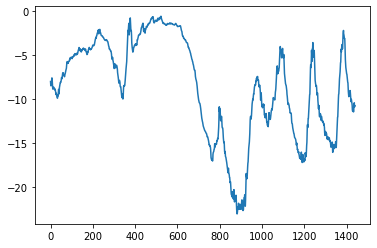

In [156]:
display(plt.plot(range(1440), temp[:1440]))

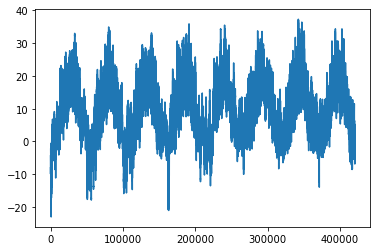

In [157]:
display(plt.plot(range(len(temp)), temp))
        
        

In [158]:
# Preparing the data 

"""
The fomulation of the problem will be as follows: 
   Given data going as far back as lookback steps  (a timestep is 10 mins)
   and sampled every staps timesteps,
   can you predict the tamperature in delay timesteps?

Using the following parameters values:

    * lookback = 720 -- obsevations will go back 5 days.
    * steps = 6 -- Observation will be sampled at one data point per hour.
    * delayed = 144 -- targers will be 24 hours on the future. 
"""

'\nThe fomulation of the problem will be as follows: \n   Given data going as far back as lookback steps  (a timestep is 10 mins)\n   and sampled every staps timesteps,\n   can you predict the tamperature in delay timesteps?\n\nUsing the following parameters values:\n\n    * lookback = 720 -- obsevations will go back 5 days.\n    * steps = 6 -- Observation will be sampled at one data point per hour.\n    * delayed = 144 -- targers will be 24 hours on the future. \n'

In [159]:
# To get started
# Preprocess ther data to a format a neural network cna ingest.
# Write a Python generator that takes the currenta array of float fata and
    # yields batches of data from the recent past, along with the temp
        # in the future
        
        
mean = jena_climate[:2000000].mean(axis=0)

jena_climate -= mean 

std = jena_climate[:200000].std(axis=0)

jena_climate /= std

In [160]:
jena_climate

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,0.861686,-1.973287,-2.020624,-1.933333,1.033813,-1.332406,-1.529867,-0.789711,-1.531192,-1.533130,2.157740,-0.716035,-0.764747,-0.258922
2009-01-01 00:20:00,0.867582,-2.017342,-2.064184,-1.986362,1.039791,-1.345411,-1.551306,-0.791777,-1.549949,-1.554296,2.205988,-0.917771,-0.872012,-0.445960
2009-01-01 00:30:00,0.862866,-2.028639,-2.075353,-1.990549,1.069682,-1.348012,-1.553688,-0.793843,-1.553700,-1.556648,2.216344,-1.262673,-1.245294,-0.036093
2009-01-01 00:40:00,0.860507,-2.006046,-2.051898,-1.957057,1.087617,-1.341510,-1.539395,-0.795909,-1.538695,-1.542537,2.191631,-1.165059,-1.301072,0.268709
2009-01-01 00:50:00,0.860507,-2.001528,-2.048547,-1.952870,1.081639,-1.340209,-1.537013,-0.795909,-1.538695,-1.540185,2.187160,-1.178074,-1.245294,0.456902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1.280296,-1.524827,-1.607367,-1.825879,-0.173790,-1.177643,-1.484609,-0.583115,-1.486175,-1.490798,1.810120,-0.950309,-0.863431,0.753622
2016-12-31 23:30:00,1.263787,-1.445754,-1.528066,-1.816111,-0.376452,-1.145129,-1.479845,-0.537663,-1.482423,-1.486094,1.726805,-0.644452,-0.691807,0.687813
2016-12-31 23:40:00,1.250816,-1.424291,-1.505728,-1.837043,-0.484060,-1.136026,-1.489373,-0.514938,-1.489926,-1.495501,1.702092,-0.683498,-0.657483,0.467293


In [221]:
# Generator yielding timeseries samples and their targets

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, steps=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle: 
            rows = np.random.randint(
                min_index = lookback,size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets
            

In [222]:
# Preparing the trainging, validaation and test genrators 

lookback = 1440
step = 6 
delay = 144
batch_size = 128

In [226]:
# Preparing the trainging, validaation and test genrators 

lookback = 1440
step = 6 
delay = 144
batch_size = 128

train_gen = generator(jena_climate,
                     lookback=lookback,
                     delay = delay,
                     min_index = 0,
                     max_index = 200000,
                     shuffle = True,
                     batch_size = batch_size)

val_gen = generator(jena_climate,
                    lookback = lookback,
                    delay = delay,
                    min_index = 2000001,
                    max_index = 300000,
                    batch_size = batch_size)

test_gen = generator(jena_climate,
                     lookback = lookback,
                     delay = delay,
                     min_index = 300001,
                     max_index = None,
                     batch_size = batch_size)

val_steps = (300000 - 2000001 - lookback)

test_steps = (len(jena_climate) - 3000001 - lookback)

In [227]:
# Computing the common-sense baseline MAE 

def evalute_naive_method():
    batch_ames = []
    
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samplesq[:, -1, 1]
        
        mae = np.mean(np.abs(preds - targets))
        
        batch_ames.append(mae)
    print(np.mean(batch_ames))
    
evalute_naive_method()


# Converting the MAE back to a celsius erroe 


calcius_mae = 0.29 * std[1]

nan


C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [169]:
# Training and evaluating a densely connected model

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras import layers

densconn_model = Sequential()


In [175]:
densconn_model(layers.Flatten(jena_climate))

densconn_model.add((layers.Dense(32, activation='relu')))

densconn_model.add(layers.Dense(1))

AttributeError: 'DataFrame' object has no attribute 'lower'

In [182]:
densconn_model.compile(optimizer=RMSprop(), loss='mae')

DenCoN_history = densconn_model.fit_generator(jena_climate,
                                             steps_per_epoch=500,
                                             epochs=20)


ValueError: When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.

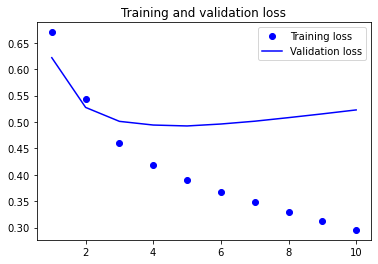

In [177]:

import matplotlib.pyplot as plt 

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')

plt.plot(epochs, val_loss, 'b', label = 'Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.show()



In [228]:
# A first recurrent baseline: Gated recurrent unit (GRU) layers work using the same principle as LSTM 
# but streamlined and thus cheaper to run (although they may not have as mich representational power ^)

from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.datasets import imdb

from tensorflow.keras import layers


In [229]:
GRU_model.add(layers.GRU(32, input_shape=(jena_climate)))

GRU_model.add(layers.Dense(1))

GRU_model.compile(optimizer=RMSprop(), loss='mae')

GRU_history  = GRU_model.fit_generator(jena_climate,
                                      steps_per_epoch = 500,
                                      epochs=20,
                                      validation_data=val_gen,
                                      validation_steps=val_steps)


ValueError: Error converting shape to a TensorShape: invalid literal for int() with base 10: 'p (mbar)'.

In [230]:
# Training and evaluating a dropout-regularized GRU-based model

from tensorflow.keras.models import Sequential

from tensorflow.keras import layers 

from tensorflow.keras.optimizers import RMSprop

GRUBased_model = Sequential()



In [231]:
GRUBased_model.add(layers.GRU(32, dropout=0.2,
                             recurrent_dropout=0.2,
                             input_shape=(None, float_data.shape[-1])))

GRUBased_model.add(layers.Dense(1))

GRUBased_model.compile(optimizer=RMSprop(), loss='mae')


history_GRUBASED = GRUBased_model.fit_generator(train_gen,
                                                steps_per_epoch=500,
                                                epochs=40,
                                                validation_data = val_gen,
                                                validation_steps = val_steps)


NameError: name 'float_data' is not defined

In [232]:
# trainging ans evaluating a dropout regualarized, stacked GRU model 

from tensorflow.keras.models import Sequential

from tensorflow.keras import layers

from tensorflow.keras.optimizers import RMSprop

stacked_GRU = Sequential()

stacked_GRU.add(layers.GRU(32,
                          dropout=0.1,
                          recurrent_dropout=True,
                          input_shape=(None, float_data.shape[-1])))


stacked_GRU.add(labels.GRU(64, activation='relu',
                          dropout=0.1,
                          recurrent_dropout=0.5))

stacked_GRU.add(labels.Dense(1))

stacked_GRU_history = fit_generator(train_gen,
                                   steps_per_epoch=500,
                                   epochs=40,
                                   validation_data = val_gen,
                                   validation_step = val_step)

NameError: name 'float_data' is not defined

In [213]:
"""
# Using bidirectional RNNs:
The last technique introsudced in this sections is called bidirectinal RNNs,
A bidirectional RNN is a common RNN variaent that can offer greater performance than reg RNNs.


# Traing and evalutaing an LSTM using reversed sequences 
"""
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.datasets import imdb

from tensorflow.keras import layers

max_features = 10000

maxlen = 500


In [214]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)

x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

reversed_model = Sequential()

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [215]:

reversed_model.add(layers.Embedding(max_features, 128))

reversed_model.add(layers.LSTM(32))

reversed_model.add(layers.Dense(1, activation='sigmoid'))

reversed_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

revHistory = reversed_model.fit(x_train, y_train,
                               epochs=10, batch_size = 128,
                               validation_split=0.2)


KeyboardInterrupt: 

In [193]:
# Training and evaluating a bidirectional LSTm 
bidirectional_model = Sequential()

bidirectional_model.add(layers.Embedding(max_features, 128))

bidirectional_model.add(layers.LSTM(32))

bidirectional_model.add(layers.Dense(1, activation='sigmoid'))

bidirectional_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

bidirectional_History = reversed_model.fit(x_train, y_train,
                               epochs=8, batch_size = 128,
                               validation_split=0.2)


In [216]:
# Training a bidirectional GRU 

from tensorflow.keras.models import Sequential 

from tensorflow.keras import layers 

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [206]:
bidirectional_model = Sequential()

bidirectional_model.add(
    layers.Bidirectional(layers.GRU(32),
                         input_shape=(None, float_data.shape[-1])))

bidirectional_model.compile(optimizer=RMSprop(), loss='mae')

bidiHistory = bidirectional_model.fit_generator(train_gen,
                                                steps_per_epoch=500,
                                                epochs=40,
                                                validation_data=val_gen,
                                               validation_steps=val_steps)

NameError: name 'float_data' is not defined

In [208]:
# Sequence processing with convnets:  Preparing the IMDB data

max_features = 10000

max_len = 500

print("Loading data.....")

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data.....


C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


x_train shape: (25000,)
x_test shape: (25000,)


C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [209]:
# Training and evaluating a single 1d convnet on the IMDB data

ONE_model = Sequential()


In [212]:
ONE_model.add(layers.Embedding(max_features, 128, input_length=max_len))

ONE_model.add(layers.Conv1D(32, 7, activation='relu'))

ONE_model.add(layers.MaxPooling1D(5))

ONE_model.add(layers.Conv1D(32, 7, activation='relu'))

ONE_model.add(layers.MaxPooling1D())

ONE_model.add(layers.Dense(1))

ONE_model.summary()

ONE_model.compile(optimizer=RMSprop(lr=1e-4),
                 loss='binary_crossentropy',
                 metrics=['acc'])

ONE_modelHistory = ONE_model.fit(x_train, y_train,
                                epochs=10,
                                batch_size=128,
                                validation_split=0.2)

ValueError: Input 0 of layer conv1d_3 is incompatible with the layer: expected ndim=3, found ndim=5. Full shape received: [None, 46, 1, 128, 128]

In [258]:
# Preparing higher-resolution data generator for the jena datset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

step = 3 
lookback = 720 

delay = 144


train_gen = generator(x_train,
                     lookback = lookback,
                     delay = delay,
                     min_index=0,
                     max_index=200000,
                     shuffle=True,
                     steps=step)

val_gen = generator(x_train,
                   lookback = lookback,
                   delay= delay,
                   min_index= 200001,
                   max_index=300000,
                   steps=step)

val_steps = (300000 - 200001 - lookback) // 128 

test_steps = (len(jena_climate) - 300001 - lookback) // 128 

In [259]:
from tensorflow.keras.models import Sequential

from tensorflow.keras import layers 

from tensorflow.keras.optimizers import RMSprop


ONEdGRUModel = Sequential()


In [260]:
ONEdGRUModel.add(layers.Conv1D(32, 5, activation='relu'))

ONEdGRUModel.add(layers.MaxPool1D(3))

ONEdGRUModel.add(layers.Conv1D(32, 5, activation='relu'))

ONEdGRUModel.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))

ONEdGRUModel.add(layers.Dense(1))

ONEdGRUModel.compile(optimizer=RMSprop(), loss='mae')

ONEdGRUModelHistory = ONEdGRUModel.fit_generator(train_gen,
                                                steps_per_epoch=100000 ,
                                                epochs=20,
                                                validation_data=val_gen,
                                                validation_steps=val_steps)

Epoch 1/20


TypeError: randint() takes at least 1 positional argument (0 given)